In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Loading and preprocessing data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


# Step 2: Defining Custom CNN

In [3]:
def create_custom_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Step 3: Defining Modified AlexNet

In [4]:
def create_alexnet():
    model = models.Sequential([
        layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=2, strides=2),

        layers.Conv2D(192, kernel_size=3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=2, strides=2),

        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=2, strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Step 4: Training function

In [5]:
def train_and_evaluate(model, name, epochs=5):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"\nTraining {name}...\n")
    history = model.fit(x_train, y_train_cat, epochs=epochs, batch_size=64,
                        validation_data=(x_test, y_test_cat), verbose=2)
    test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    return test_acc, history

# Step 5: Plotting

In [6]:
def plot_history(history, model_name):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Step 6: Running Experiments

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Custom CNN...

Epoch 1/5
782/782 - 12s - 15ms/step - accuracy: 0.3860 - loss: 1.6806 - val_accuracy: 0.5634 - val_loss: 1.2390
Epoch 2/5
782/782 - 4s - 5ms/step - accuracy: 0.5465 - loss: 1.2793 - val_accuracy: 0.6096 - val_loss: 1.0737
Epoch 3/5
782/782 - 5s - 7ms/step - accuracy: 0.6060 - loss: 1.1153 - val_accuracy: 0.6676 - val_loss: 0.9501
Epoch 4/5
782/782 - 3s - 4ms/step - accuracy: 0.6587 - loss: 0.9817 - val_accuracy: 0.7015 - val_loss: 0.8554
Epoch 5/5
782/782 - 4s - 5ms/step - accuracy: 0.6876 - loss: 0.8956 - val_accuracy: 0.7193 - val_loss: 0.8215
Custom CNN Test Accuracy: 0.7193


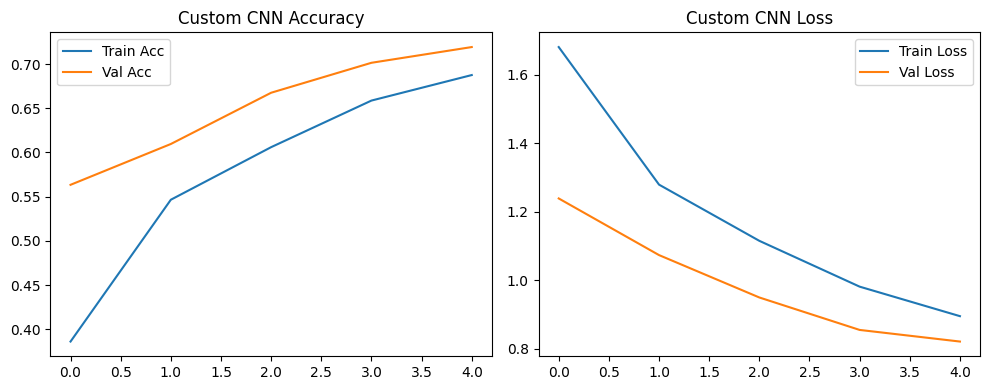


Training AlexNet...

Epoch 1/5
782/782 - 37s - 47ms/step - accuracy: 0.4408 - loss: 1.5415 - val_accuracy: 0.4196 - val_loss: 1.6130
Epoch 2/5
782/782 - 27s - 34ms/step - accuracy: 0.6066 - loss: 1.1242 - val_accuracy: 0.5813 - val_loss: 1.2095
Epoch 3/5
782/782 - 21s - 26ms/step - accuracy: 0.6654 - loss: 0.9675 - val_accuracy: 0.6077 - val_loss: 1.1338
Epoch 4/5
782/782 - 21s - 26ms/step - accuracy: 0.7018 - loss: 0.8717 - val_accuracy: 0.5922 - val_loss: 1.2182
Epoch 5/5
782/782 - 20s - 26ms/step - accuracy: 0.7307 - loss: 0.7931 - val_accuracy: 0.6971 - val_loss: 0.8873
AlexNet Test Accuracy: 0.6971


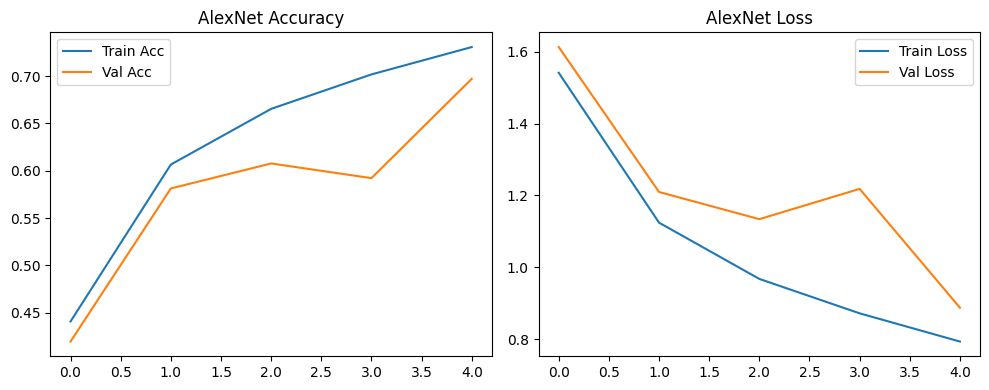

In [7]:
custom_model = create_custom_cnn()
alexnet_model = create_alexnet()

custom_acc, custom_history = train_and_evaluate(custom_model, "Custom CNN", epochs=5)
plot_history(custom_history, "Custom CNN")

alexnet_acc, alexnet_history = train_and_evaluate(alexnet_model, "AlexNet", epochs=5)
plot_history(alexnet_history, "AlexNet")

# Step 7: Summary

In [8]:
print("\nFinal Comparison")
print(f"Custom CNN Accuracy: {custom_acc:.4f}")
print(f"AlexNet Accuracy:    {alexnet_acc:.4f}")



Final Comparison
Custom CNN Accuracy: 0.7193
AlexNet Accuracy:    0.6971


The results show that the custom CNN achieved higher test accuracy (71.9%) compared to the AlexNet variant (69.7%) on the CIFAR-10 dataset.